In this Jupyter notebook will be exploring a use case where we have a sample dataset for 50 Startups.The Goal it to predict whether a particular startup would be safe to invest in or not. Will be using Multiple Linear Regression. A Simple Linear Regression has one dependent variable and one independet variable. But in case of multiple linear regression there will be multiple independent variables.

In [1]:
#Importing Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
#Loading dataset
df = pd.read_csv("../Dataset/50_Startups.csv")

In [3]:
#Exploring the dataset
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


This dataset contains 5 Columns:

1> R&D Spend: Amount of expenditure done by a startup on reserach ad development. (Numerical Variable)

2> Administration: Amount of expenditure done by a startup on implementing day to day processes. (Numerical Variable)

3> Marketing Spend: Amount of expenditure done by a startup on Marketing.(Numerical Variable)

4> State: US State to which the startup belongs to. (Categorical Variable)

5> Profit: Amount of profit made by a startup.

In [4]:
df.shape

(50, 5)

In [5]:
#Checking for Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


We have a dataset of 50 rows anf 5 columns with one categorical variable.

In [6]:
#EDA
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
#Checking for Null values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

From the above output we can say that there is no null values present.

Lets analyse the realtionship betwwen R&D Spend vs Profit

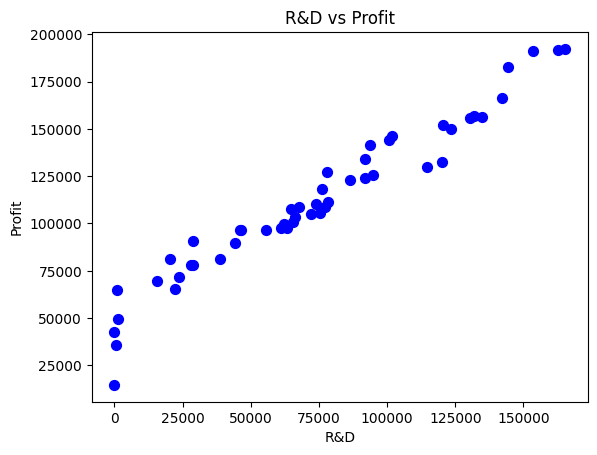

In [8]:
#selection of all rows (:) and the first column (0). [R&D Spend Column]
x1 = df.iloc[:, 0].values
#selection of all rows (:) and the last column (-1). [Profit Column]
y1 = df.iloc[:, -1].values

plt.scatter(x1,y1,color='Blue',s=50)
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.title('R&D vs Profit')
plt.show()


As per above scatter plot, looks like a good relationship between R&D Spend and Profit.

Lets analyze the realtionship between Marketing Spend and Profit.

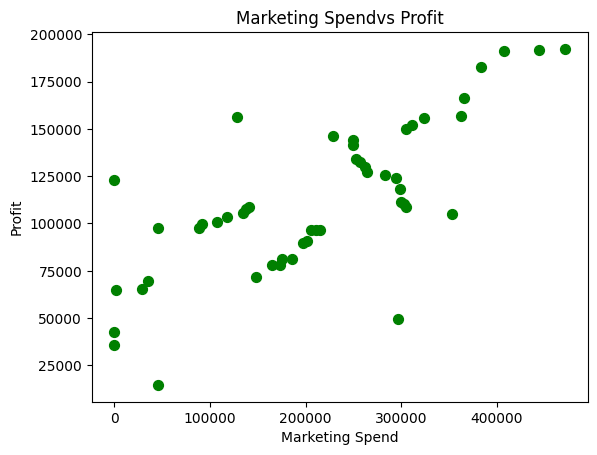

In [9]:
#selection of all rows (:) and the second column (0). [Administration Column]
x1 = df.iloc[:, 2].values
#selection of all rows (:) and the last column (-1). [Profit Column]
y1 = df.iloc[:, -1].values

plt.scatter(x1,y1,color='Green',s=50)
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Marketing Spendvs Profit')
plt.show()

Lets analyze the realtionship between Administration Spend and Profit.

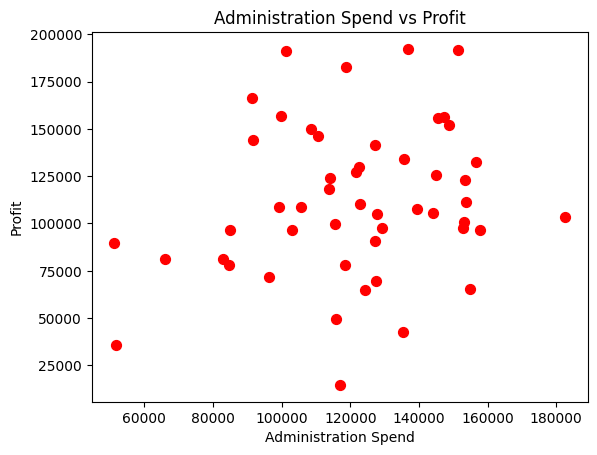

In [10]:
#selection of all rows (:) and the second column (0). [Administration Column]
x1 = df.iloc[:, 1].values
#selection of all rows (:) and the last column (-1). [Profit Column]
y1 = df.iloc[:, -1].values

plt.scatter(x1,y1,color='Red',s=50)
plt.xlabel('Administration Spend')
plt.ylabel('Profit')
plt.title('Administration Spend vs Profit')
plt.show()

Lets analyze the realtionship between State (Categorical variable) and Profit.

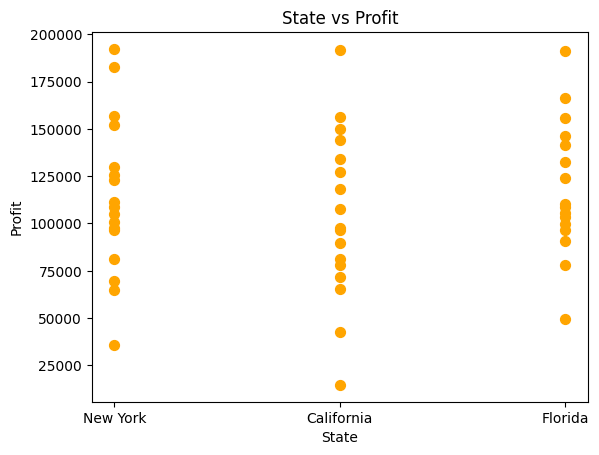

In [11]:

#Plot State vs Profit
x1 = df.iloc[:, 3].values
y1 = df.iloc[:, -1].values
plt.scatter(x1,y1,color='Orange',s=50)
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('State vs Profit')
plt.show()

In [12]:
#Checking unique values for Column State
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [16]:
#Will be loading the dataset again to a new variable, then will be dropping the categorical State (Axis 0 is Rows and Axis 1 is Column) 
#Temporary variable is used for correlation without messing with the shape of original dataset
df1 = pd.read_csv("../Dataset/50_Startups.csv")
df1.drop(['State'], axis=1, inplace=True)
df1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<Axes: >

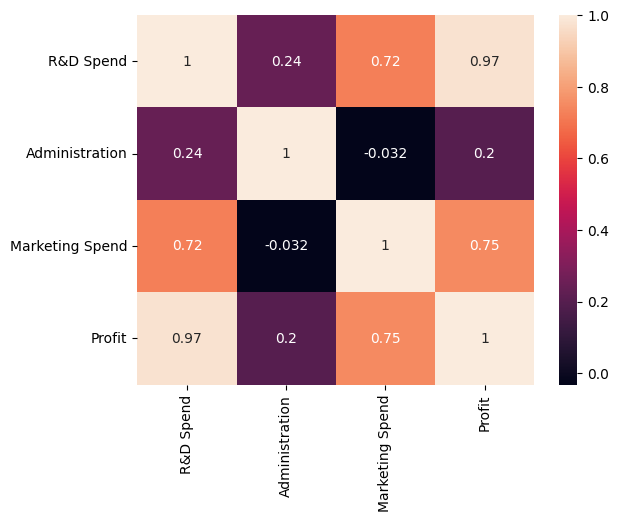

In [14]:
# Checking the correaltion between variables using heatmap
sns.heatmap( df1.corr(), annot=True)

# From the above heatmap the correaltion is high betweeen R&D Spend 

Separating dependent and independent variables for and prepairing them for model training.

In [36]:
#Selecting all rows and columns except last column which our dependent variable
x = df.iloc[:, :-1].values
print(x)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [37]:
#Selecting all rows for last column which is our dependent variable
y = df.iloc[:, 4].values
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


As state column has a categorical variable. So,convert categorical variable to numerical using LabelEncode and OneHotEncode.



In [38]:
# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the column transformer object to specify which columns to one-hot encode, leave other columns unchanged via remainder
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [3])],  # Specify the transformer, OneHotEncoder, and the columns to apply it to
    remainder='passthrough'  # Keep the remaining columns as they are
)

# Apply the column transformer to your data
x = ct.fit_transform(x)

In [39]:
#As there is hight correlation between R&D Spend and Profit. 
#Therefore to avoid the Dummy Variable Trap, we are taking all rows of array and excluding the first column which is R&D Spend.
x = x[:, 1:]

In [40]:
print(x)

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 134615.46 147198.87 127716.82]
 [1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 120542.52 148718.95 311613.29]
 [0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 101913.08 110594.11 229160.95]
 [0.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 93863.75 127320.38 249839.44]
 [0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 86419.7 153514.11 0.0]
 [0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 73994.56 122782.75 303319.26]
 [1.0 0.0 67532.53 105751.03 304768.73]
 [0.0 1.0 77044.01 99281.34 140574.81]
 [0

In [48]:
#Splitting the dataset into the Training set and Test set
#80% of the data will be used for training and 20% of the data will be used for testing randomly
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [51]:
#Training the model
#Fitting Multiple Linear Regression to the Training set
#Importing the function LinearRegression from the liner_model which belongs to package scikit learn
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [50]:
#Predicting the Test set results
y_pred = regressor.predict(x_test)

In [54]:
#Evaluate the result

#Statsmodels is a Python library used for estimating statistical models and conducting statistical tests.
import statsmodels.api as sm
x

#The variable x_opt is created to store the independent variables (features) that will be used in the regression analysis. 
#All rows and the first five columns of the original independent variable x are selected
x_opt = x[:,[0,1,2,3,4]]
x_opt

#Converting x_opt to a NumPy array, it ensures that the data type is explicitly set to float
x_array = np.array(x_opt, dtype=float)

#sm.OLS() function is used to fit the Ordinary Least Squares (OLS) regression model
#endog: This argument represents the dependent variable (response variable) of the regression model, denoted as y in this case.
#exog: This argument represents the independent variables (predictor variables) of the regression model
regressor_OLS = sm.OLS(endog=y, exog=x_array).fit()

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              727.1
Date:                Sat, 27 Jan 2024   Prob (F-statistic):                    7.87e-42
Time:                        22:52:33   Log-Likelihood:                         -545.15
No. Observations:                  50   AIC:                                      1100.
Df Residuals:                      45   BIC:                                      1110.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3464.4536   4905.406      0.706      0.484   -6415.541    1.33e+04
x2          5067.8937   4668.238      1.086      0.283   -4334.419    1.45e+04
x3             0.7182      0.066     10.916      0.000       0.586       0.851
x4             0.3113      0.035      8.885      0.000       0.241       0.382
x5             0.0786      0.023      3.429      0.001       0.032       0.125
==============================================================================
Omnibus:                        1.355   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.241
Skew:                          -0.237   Prob(JB):                        0.538
Kurtosis:                       2.391   Cond. No.                     8.28e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""